<a href="https://colab.research.google.com/github/thekateee23/cs102/blob/homework06/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Задание №1**

1. Загрузите датасет music_genre.csv.
2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [47]:
music <- read.csv("music_genre.csv")
music <- music[sample(nrow(music), 20000, replace=F),]
head(music)

if (nrow(music[duplicated(music), ]) > 0) {
music <- distinct(music)
}

empty_rows <- music[music$artist_name == "empty_field", ]

if (nrow(empty_rows) > 0) {
  music <- music[!(music$artist_name == "empty_field"), ]
} else {
  cat("Нет дубликатов строк")
}

music <- na.omit(music)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
48403,64073,Russ,Too Many,60,0.6060,0.743,161071,0.507,0.00e+00,D,0.111,-3.164,Minor,0.1350,79.01100000000001,4-Apr,0.3580,Hip-Hop
32369,62569,John Fogerty,Blue Moon Nights,40,0.1650,0.678,153027,0.814,1.88e-05,A,0.206,-5.591,Major,0.0280,108.383,4-Apr,0.8470,Blues
2729,64680,SVDDEN DEATH,BZZRK - Ubur Remix,28,0.0611,0.530,219200,0.938,1.02e-01,A#,0.667,-1.244,Minor,0.1890,74.663,4-Apr,0.2750,Electronic
34938,87403,Roy Buchanan,The Messiah Will Come Again,29,0.7360,0.437,355400,0.142,6.51e-01,A,0.116,-17.438,Minor,0.0329,94.615,4-Apr,0.0684,Blues
26858,83090,Drake,Houstatlantavegas,70,0.3930,0.683,290791,0.695,1.24e-03,C#,0.124,-6.798,Minor,0.0574,135.33700000000002,4-Apr,0.4060,Rap
8490,69211,Cö Shu Nie,Person.,41,0.0176,0.458,235467,0.906,1.34e-06,G#,0.575,-4.112,Major,0.0599,122.936,4-Apr,0.4940,Anime


**Вывод:**

Сделала предобработку данных согласно заданию.

**Задание №2**

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [48]:
genre_props <- prop.table(table(music$music_genre))

cat("Доля каждого жанра в датасете:\n")
print(genre_props)

Доля каждого жанра в датасете:

Alternative       Anime       Blues   Classical     Country  Electronic 
 0.09971106  0.10118203  0.09992120  0.09845022  0.10165485  0.10186499 
    Hip-Hop        Jazz         Rap        Rock 
 0.09960599  0.10023641  0.09913318  0.09824008 


In [49]:
genre_count <- music %>%
  count(music_genre) %>%
  mutate(share = n / sum(n)) %>%
  arrange(desc(share))

genre_count

music_genre,n,share
<chr>,<int>,<dbl>
Electronic,1939,0.10186499
Country,1935,0.10165485
Anime,1926,0.10118203
Jazz,1908,0.10023641
Blues,1902,0.09992120
Alternative,1898,0.09971106
Hip-Hop,1896,0.09960599
Rap,1887,0.09913318
Classical,1874,0.09845022


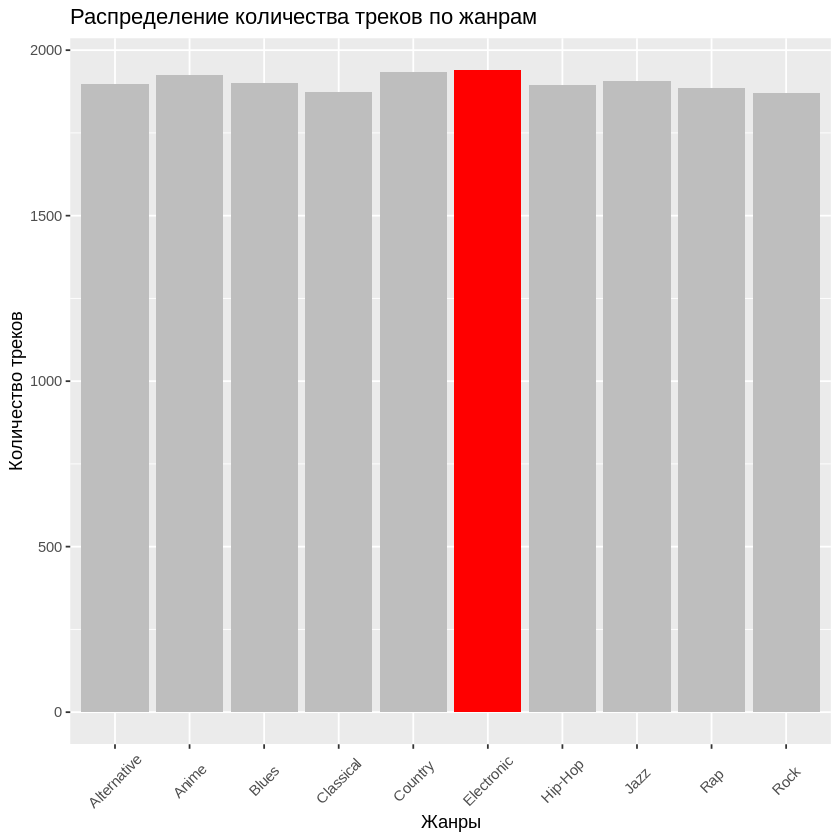

In [50]:
library(ggplot2)

genre_count <- music %>%
  group_by(music_genre) %>%
  summarize(track_count = n()) %>%
  arrange(desc(track_count))

ggplot(genre_count, aes(x = music_genre, y = track_count)) +
  geom_col(fill = ifelse(genre_count$music_genre[1] == genre_count$music_genre, "red", "grey")) + 
  labs(title = "Распределение количества треков по жанрам",
       x = "Жанры",
       y = "Количество треков") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

In [51]:
most_popular_genre <- music %>%
  count(music_genre) %>%
  filter(n == max(n)) %>%
  pull(music_genre)
cat(paste("Most popular genre is", most_popular_genre, "\n"))

Most popular genre is Electronic 


In [52]:
danceability_by_genre <- music %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))

most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)

cat("Самый танцевальный жанр:", most_danceable_genre$music_genre, "\n")
cat("Среднее значение показателя danceability:", most_danceable_genre$mean_danceability, "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability: 0.7208623 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


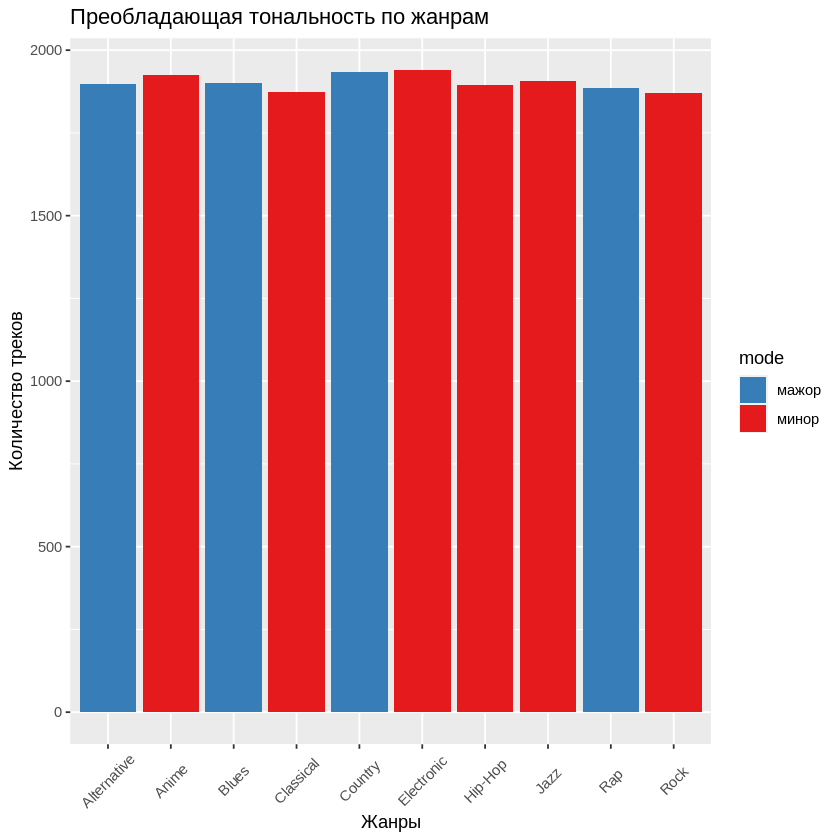

In [53]:
tonality_by_genre <- music %>%
  group_by(music_genre, key) %>%
  summarise(track_count = n()) %>%
  mutate(mode = ifelse(sum(key == "C") == 0 & sum(key == "D") == 0, "No tracks",
                       ifelse(track_count[key == "C"] < track_count[key == "D"], "major", "minor")))

ggplot(tonality_by_genre, aes(x = music_genre, y = track_count, fill = mode)) +
  geom_bar(stat = "identity") +
  labs(title = "Преобладающая тональность по жанрам", 
       x = "Жанры", y = "Количество треков") +
  scale_fill_manual(values = c("#377eb8", "#e41a1c", "#999999"), 
                    labels = c("мажор", "минор")) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

**Вывод:**

1) Определила долю каждого жанра в датасете

2)показала распределение на диаграмме, больше всего треков в жанре *электро*

3)Определила самый танцевальный жанр - это *хипхоп*

4)в *в классике, аниме, электро, хипхопе, джазе, роке* преобладает **минор**,  *в альтернативной музыке,блюзе, кантри, рэпе* превалирует **мажор**.

**Задание №3**

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [54]:
most_tracks <- names(sort(table(music$artist_name), decreasing = TRUE)[1])
most_count <- max(table(music$artist_name))
cat("Исполнитель с наибольшим количеством треков:", most_tracks, "(", most_count, "треков)\n")

least_tracks <- names(sort(table(music$artist_name))[1])
least_count <- min(table(music$artist_name))
cat("Исполнитель с наименьшим количеством треков:", least_tracks, "(", least_count, "трек)\n")

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 185 треков)
Исполнитель с наименьшим количеством треков: ? & The Mysterians ( 1 трек)


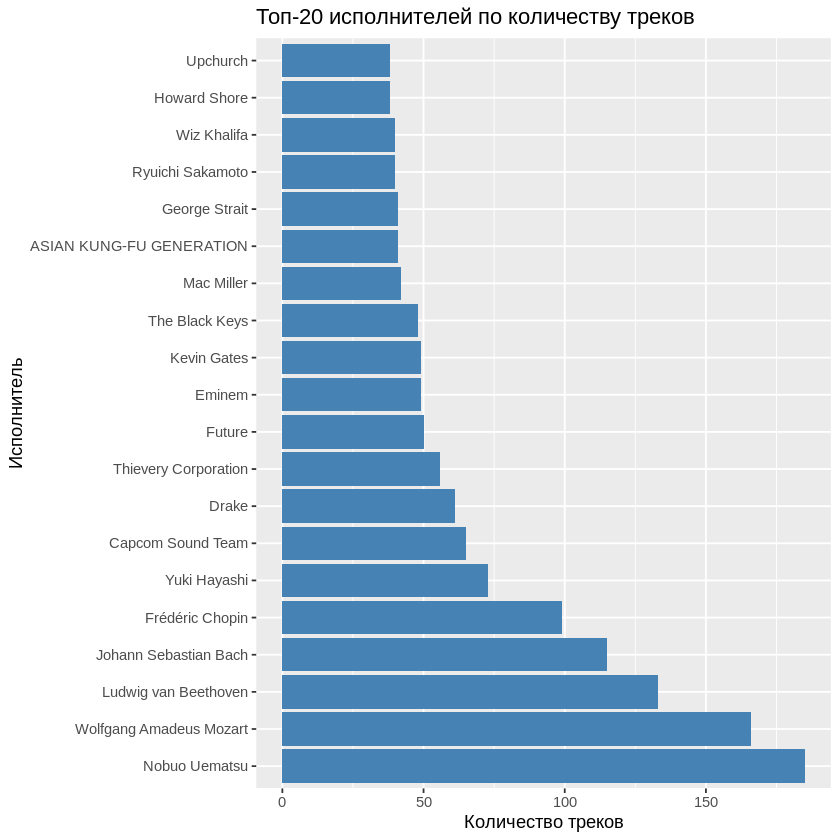

In [55]:
library(ggplot2)

top_artists <- music %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("Топ-20 исполнителей по количеству треков") +
  xlab("Количество треков") +
  ylab("Исполнитель")


**Вывод:**

1) Определила исполнителя с наибольшим и наименьшим количеством треков, отобразила это на графике.

**Задание №4**

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая?
2. Есть ли характеристики, между которыми корреляции практически нет.
Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [56]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
install.packages("palmerpenguins")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [58]:
music$tempo <- as.numeric(music$tempo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


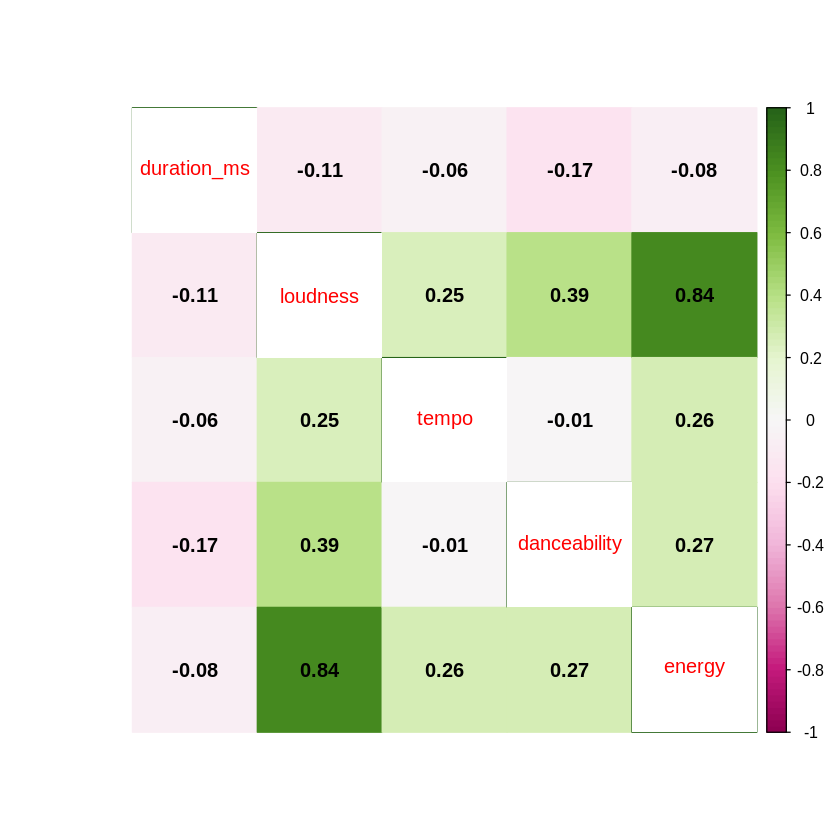

In [59]:
library(corrplot)
library(RColorBrewer)

data_clean <- na.omit(music[c('duration_ms', 'loudness', 'tempo', 'danceability', 'energy')])
data_clean$tempo <- as.numeric(data_clean$tempo)

cor_mat <- cor(data_clean)

col_ramp <- colorRampPalette(brewer.pal(11, 'PiYG'))
corrplot(cor_mat, method = "color", tl.pos = "d", addCoef.col = "black", col = col_ramp(100))

In [60]:
cor(music$popularity, nchar(as.character(music$track_name)))

[1] -0.2064843

**Вывод:**

1) наибольшая корреляция между громкостью и энергичностью, так же она достатчно высока у связи с танцевальностью и громкостью, энергичностью и танцевальностью.
Менее сильная она у всего, что связано с длительностью. 


2) Определила корреляцию между популярностью трека и длиной трека, она отрицательная, соответственно, корреляция слабая.

**Задание №5**

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

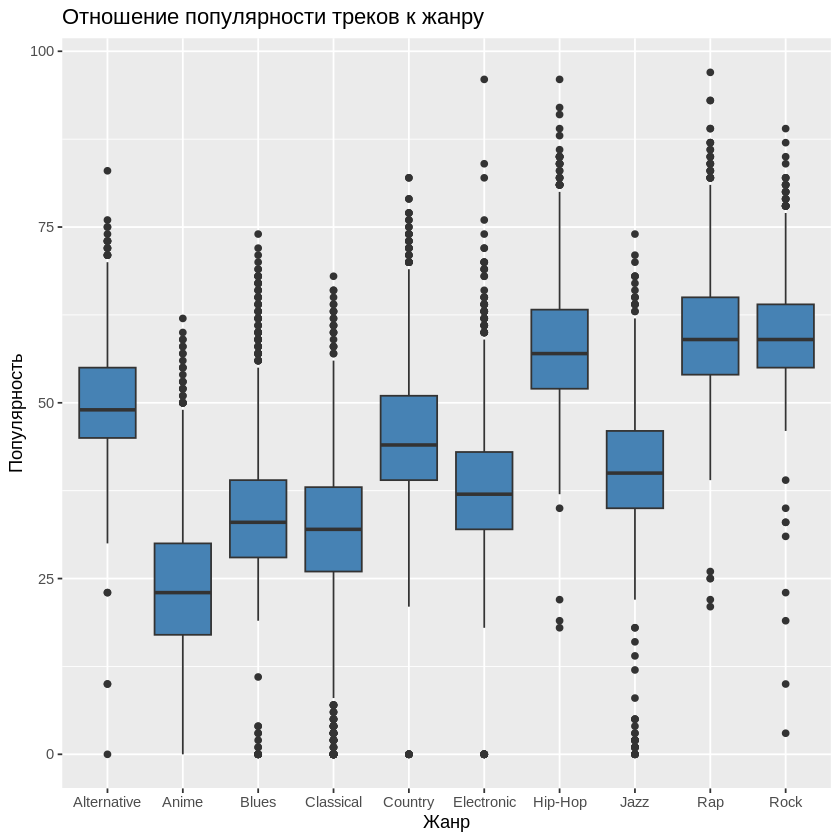

In [61]:
library(ggplot2)

ggplot(music, aes(x = music_genre, y = popularity)) +
  geom_boxplot(fill = "steelblue") +
  ggtitle("Отношение популярности треков к жанру") +
  xlab("Жанр") +
  ylab("Популярность")

**Вывод:**

Построила диаграмму "Ящик с усами"; наиболее похожими жанрами являются рэп и рок, блюз и классика.

**Задание №7**

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

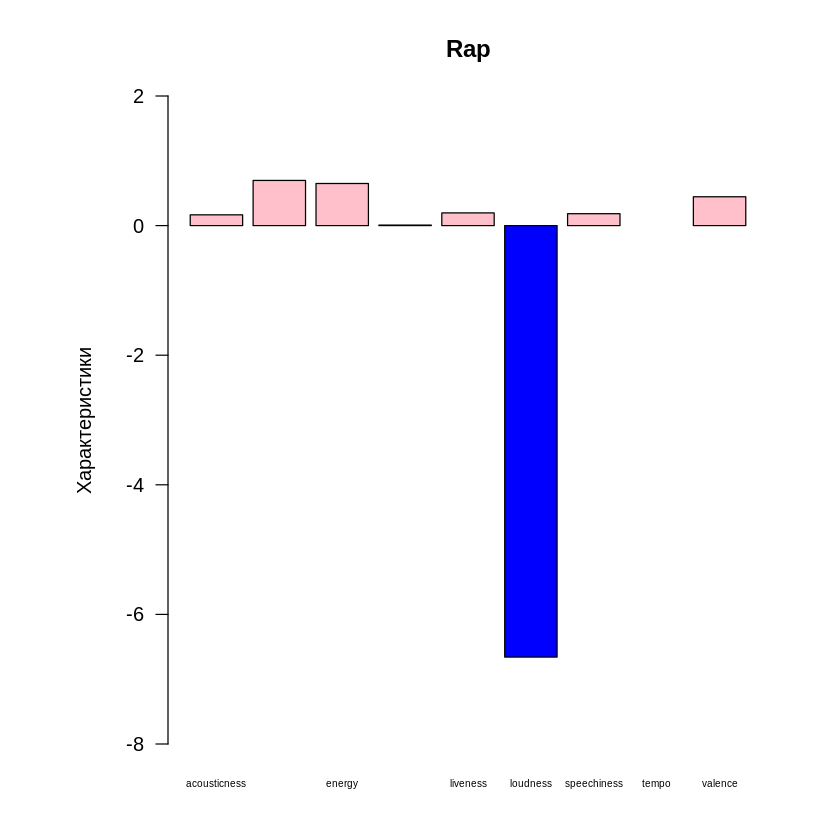

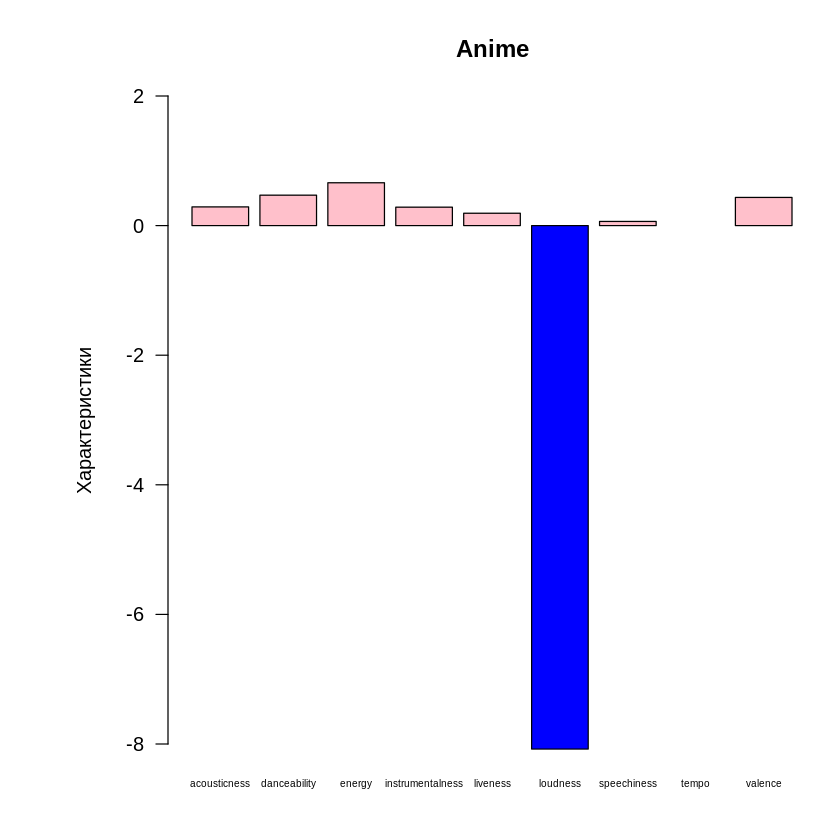

In [62]:
X <- as.numeric(unlist(colMeans(ee)))
Y <- names(unlist(colMeans(ee)))

colors = list()
for(i in 1:length(X)) {                                    
  if (!is.na(X[i]) & !is.null(X[i]) & X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,3))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=most_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors = list()
for(i in 1:length(X)) {                                    
  if (!is.na(X[i]) & !is.null(X[i]) & X[i] < 0) {
    colors[[length(colors) + 1]] <- 'blue'
  } else {
    colors[[length(colors) + 1]] <- 'pink'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,1))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=least_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)  


**Вывод:**

Построила вертикальную диаграмму, выделила разными цветами положительные и отрицательные величины в самом популярном и самом непопулярном жанрам по всем характеристикам.

**Задание №8**

1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [63]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [68]:
sum(is.na(music))

[1] 1711

In [69]:
music <- na.omit(music)

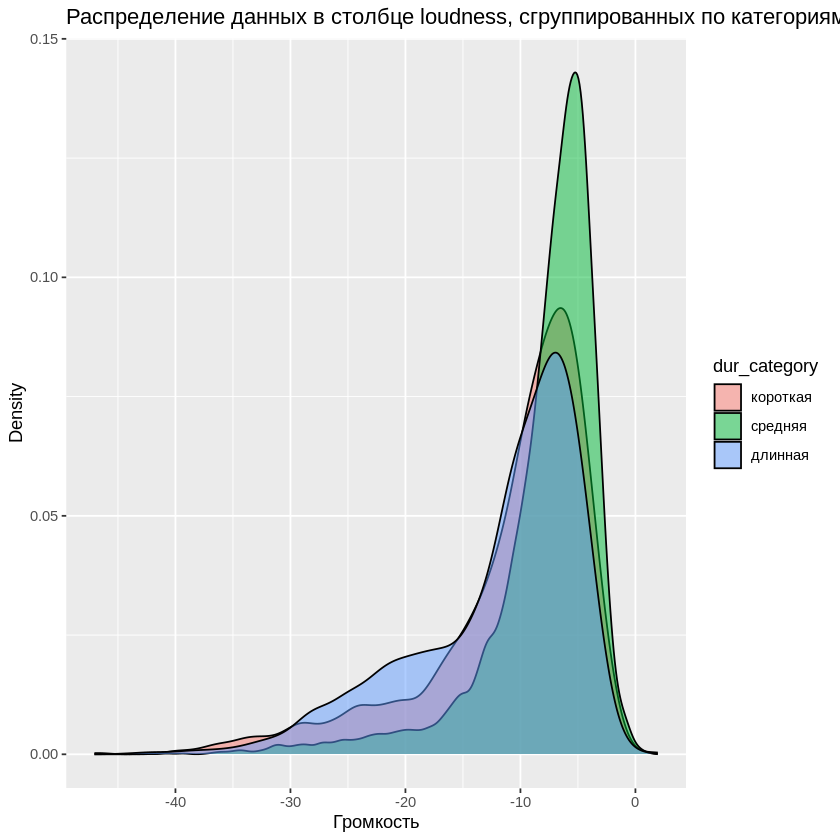

In [70]:
library(dplyr)
library(ggplot2)

music <- music %>%
  mutate(dur_category = cut(duration_ms/60000, 
                             breaks = c(0, 3, 5, Inf), 
                             labels = c("короткая", "средняя", "длинная")))

ggplot(music, aes(x = loudness, fill = dur_category)) +
  geom_density(alpha = 0.5) +
  xlab("Громкость") +
  ylab("Density") +
  ggtitle("Распределение данных в столбце loudness, сгруппированных по категориям длительности")

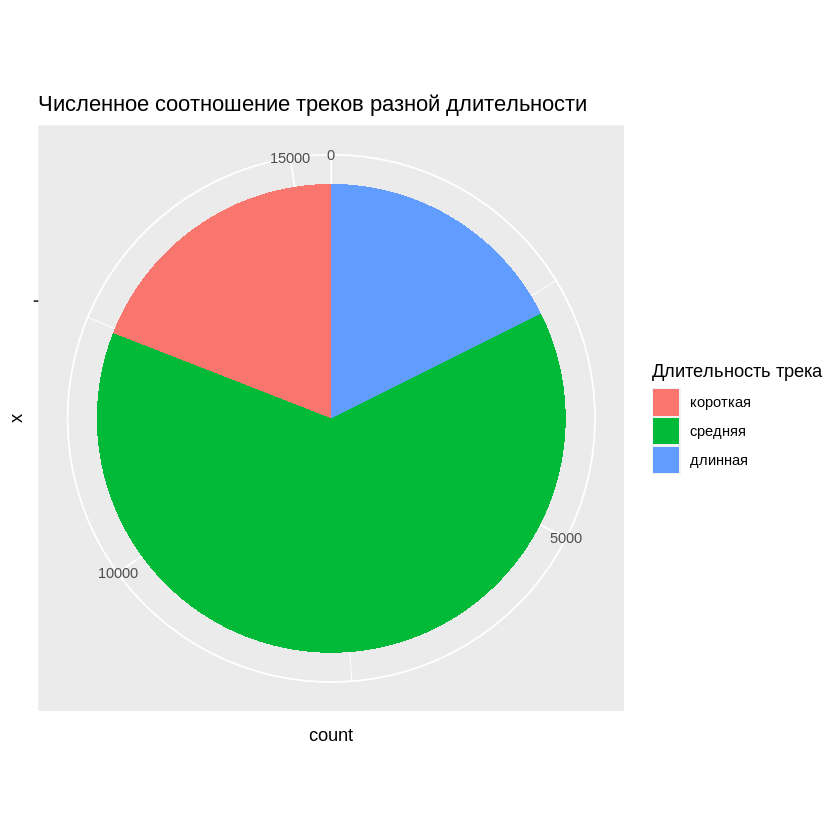

In [78]:
library(ggplot2)
ggplot(music, aes(x = "", fill = dur_category)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(fill = "Длительность трека") +
  ggtitle("Численное соотношение треков разной длительности")

**Вывод:**

1) добавила столбец, позволяющий категоризировать треки по их длительности

2)сделала распределение по громкости исходя из длительности; преобладают песни средней длины, короткие на втором месте, длинные, соответственно, на третьем.

3)сделала диаграмму, показывающую соотношение длины и количества треков; распределение по местам оказалось аналогичным предыдущему пункту.